In [1]:
#importing modules and dataset
import numpy as np
import pandas as pd
data=pd.read_csv("phishing_dataset.csv")
data1=pd.read_csv("Benign_list_big_final.csv",nrows=10000)
sent=data['url'].tolist()
sent1=data1['url'].tolist()
sent.extend(sent1)

#gray scale image conversion
arr1=[]
for x in sent:  
    res = [ord(ele) for sub in x for ele in sub] 
    lent=len(res)
    
    temp=784-lent
    for i in range(temp):
        res.append(0)
    arr1.append(res)
from sklearn import preprocessing
d = arr1


In [2]:
print(len(data))
print(len(data1))
print(len(data)+len(data1))

9965
10000
19965


In [4]:
cnn_x=d
#print(len(x[45342]))

In [5]:
#data preprocessing
cnn_y_data = [0]*9965
cnn_y1 = [1]*10000
cnn_y_data.extend(cnn_y1)
cnn_y_data = np.array(cnn_y_data)
print(cnn_y_data)

[0 0 0 ... 1 1 1]


In [6]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle


cnn_X_data= np.zeros((19965, 28, 28))

for i in range(len(cnn_x)):
    cnn_X_data[i]=np.reshape(cnn_x[i],(28,28))
print(len(cnn_X_data))



19965


In [7]:
#importing modules for embedding layer
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from tensorflow.keras.preprocessing.text import one_hot

print(len(sent))
voc_size=500000


19965


In [8]:
onehot_repr=[one_hot(words,voc_size)for words in sent]
print(onehot_repr)

[[1324, 45351, 130576, 185614, 53887, 465733, 195900, 460003, 40048, 180964, 231662, 336621, 336327, 231662, 400010, 36651, 231662, 277457, 223157, 231662, 401059, 223157, 231662, 499193, 1324, 350667, 217945, 130545, 319252, 133135, 141808, 347276, 291626, 150878, 412171, 351397, 130576, 185614, 53887, 465733], [1324, 478532, 175999, 69957, 156416, 231662, 231662, 231662, 231662, 330335, 479201, 223157, 223157, 223157, 223157, 46956, 231662, 231662, 231662, 6464, 408970, 223157, 231662, 231662, 231662, 168912, 380611, 474799, 130142, 97271, 218064, 231662, 231662, 231662, 40048, 130377, 231662, 231662, 231662, 499193, 188600, 414470, 465733, 114890, 431703, 477634, 16078, 414968, 465733, 16078, 414968, 465733, 435391, 231662, 231662, 416730, 163839, 13360], [1324, 18518, 233492, 69957, 315189, 21158, 292736, 291626, 499193, 1324, 347421, 96733, 423438, 136947, 369070, 262717, 92004, 92004], [1324, 183257, 449363, 465733, 114990, 80323, 188460, 1324, 470854, 465733, 45351, 160185, 1355

In [9]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

sent_length=370
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[     0      0      0 ... 185614  53887 465733]
 [     0      0      0 ... 416730 163839  13360]
 [     0      0      0 ... 262717  92004  92004]
 ...
 [     0      0      0 ...  12292 360244  22243]
 [     0      0      0 ... 251547 360244 372453]
 [     0      0      0 ... 251547 360244 420711]]


In [10]:
#embedding layer
dim=30

model=Sequential()
model.add(Embedding(voc_size,30,input_length=370))
model.compile('adam','mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 370, 30)           15000000  
Total params: 15,000,000
Trainable params: 15,000,000
Non-trainable params: 0
_________________________________________________________________


In [11]:
x_data = model.predict(embedded_docs)
x_data

array([[[-0.04206047,  0.01585213,  0.04946592, ...,  0.02906195,
         -0.03848217,  0.01073819],
        [-0.04206047,  0.01585213,  0.04946592, ...,  0.02906195,
         -0.03848217,  0.01073819],
        [-0.04206047,  0.01585213,  0.04946592, ...,  0.02906195,
         -0.03848217,  0.01073819],
        ...,
        [-0.04527558,  0.04564787,  0.0233151 , ..., -0.00302925,
          0.0089465 , -0.03445476],
        [-0.02301147,  0.00332228, -0.04815078, ..., -0.03185974,
          0.00086427, -0.02370324],
        [-0.01990073,  0.03031783,  0.03563778, ..., -0.0240129 ,
          0.00161476,  0.00934871]],

       [[-0.04206047,  0.01585213,  0.04946592, ...,  0.02906195,
         -0.03848217,  0.01073819],
        [-0.04206047,  0.01585213,  0.04946592, ...,  0.02906195,
         -0.03848217,  0.01073819],
        [-0.04206047,  0.01585213,  0.04946592, ...,  0.02906195,
         -0.03848217,  0.01073819],
        ...,
        [ 0.03812522,  0.03870134,  0.00410975, ..., -

In [12]:
y_data = [0]*9965
y1 = [1]*10000
y_data.extend(y1)
y_data = np.array(y_data)
print(y_data.shape)

(19965,)


In [13]:
x_data = embedded_docs
print(x_data)

[[     0      0      0 ... 185614  53887 465733]
 [     0      0      0 ... 416730 163839  13360]
 [     0      0      0 ... 262717  92004  92004]
 ...
 [     0      0      0 ...  12292 360244  22243]
 [     0      0      0 ... 251547 360244 372453]
 [     0      0      0 ... 251547 360244 420711]]


In [14]:
#train and test data splitup
import random
temp = list(zip(cnn_X_data, cnn_y_data, x_data, y_data))
random.shuffle(temp)
cnn_X_data, cnn_y_data, x_data, y_data = zip(*temp)

In [15]:
#cnn test and train data
from sklearn.model_selection import train_test_split
cnn_X_train, cnn_X_test, cnn_y_train, cnn_y_test = train_test_split(cnn_X_data, cnn_y_data, test_size=0.20)
cnn_X_train = np.array(cnn_X_train)
cnn_y_train = np.array(cnn_y_train)
cnn_X_test = np.array(cnn_X_test)
cnn_y_test = np.array(cnn_y_test)
cy_test=cnn_y_test

In [16]:
print(type(cnn_X_test))

<class 'numpy.ndarray'>


In [17]:
#CNN model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score

# loading the dataset
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

cnn_X_train = cnn_X_train.reshape(cnn_X_train.shape[0], 28, 28, 1)
cnn_X_test = cnn_X_test.reshape(cnn_X_test.shape[0], 28, 28, 1)
cnn_X_train = cnn_X_train.astype('float32')
cnn_X_test = cnn_X_test.astype('float32')

cnn_X_train /= 255
cnn_X_test /= 255

n_classes = 2
print("Shape before one-hot encoding: ", cnn_y_train.shape)
cnn_Y_train = np_utils.to_categorical(cnn_y_train, n_classes)
cnn_Y_test = np_utils.to_categorical(cnn_y_test, n_classes)
print("Shape after one-hot encoding: ", cnn_Y_train.shape)

cnn = Sequential()
cnn.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
cnn.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
cnn.add(Flatten())
# hidden layer
cnn.add(Dense(100, activation='relu'))
# output layer
cnn.add(Dense(2, activation='softmax'))


# compiling the sequential model
cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history=cnn.fit(cnn_X_train, cnn_Y_train, batch_size=128, epochs=50, validation_data=(cnn_X_test, cnn_Y_test))

Shape before one-hot encoding:  (15972,)
Shape after one-hot encoding:  (15972, 2)
Epoch 1/50
125/125 [==============================] - 8s 66ms/step - loss: 0.1866 - accuracy: 0.9397 - val_loss: 0.1229 - val_accuracy: 0.9639
Epoch 2/50
125/125 [==============================] - 8s 63ms/step - loss: 0.1196 - accuracy: 0.9672 - val_loss: 0.1009 - val_accuracy: 0.9712
Epoch 3/50
125/125 [==============================] - 8s 64ms/step - loss: 0.1002 - accuracy: 0.9718 - val_loss: 0.0869 - val_accuracy: 0.9752
Epoch 4/50
125/125 [==============================] - 8s 64ms/step - loss: 0.0902 - accuracy: 0.9733 - val_loss: 0.0776 - val_accuracy: 0.9765
Epoch 5/50
125/125 [==============================] - 8s 65ms/step - loss: 0.0820 - accuracy: 0.9752 - val_loss: 0.0701 - val_accuracy: 0.9780
Epoch 6/50
125/125 [==============================] - 8s 65ms/step - loss: 0.0753 - accuracy: 0.9779 - val_loss: 0.0654 - val_accuracy: 0.9810
Epoch 7/50
125/125 [==============================] - 8s 66

In [18]:
#accuracy of CNN model
scores = cnn.evaluate(cnn_X_test,cnn_Y_test) 
print("Accuracy: %.2f%%" % (scores[1]*100))


125/125 [==============================] - 1s 8ms/step - loss: 0.0472 - accuracy: 0.9895
Accuracy: 98.95%


In [19]:
y_result = cnn.predict_classes(cnn_X_test)
y_result

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [20]:
#validating parameters
import sklearn
print(sklearn.metrics.classification_report(cy_test,y_result))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1993
           1       0.99      0.99      0.99      2000

    accuracy                           0.99      3993
   macro avg       0.99      0.99      0.99      3993
weighted avg       0.99      0.99      0.99      3993



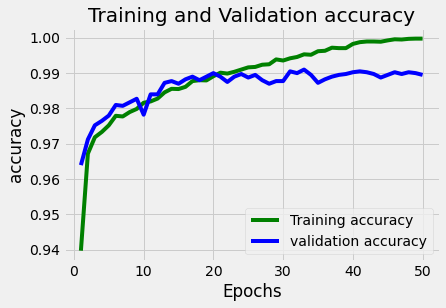

In [21]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [22]:
#lstm train and test split up
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [23]:
print(x_train.shape)
print(y_train.shape)

(15972, 370)
(15972,)


In [24]:
#LSTM model

from keras.layers import Dropout

# Initialising the LSTM
lstm = Sequential()
lstm.add(Embedding(voc_size,30,input_length=370))
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (370, 30)))
lstm.add(Dropout(0.2))

#Adding a second LSTM layer and Dropout layer
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.2))

#Adding a third LSTM layer and Dropout layer
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.2))

#Adding a fourth LSTM layer and and Dropout layer
lstm.add(LSTM(units = 50))
lstm.add(Dropout(0.2))

lstm.add(Dense(units = 1,activation='sigmoid'))
print(lstm.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 370, 30)           15000000  
_________________________________________________________________
lstm (LSTM)                  (None, 370, 50)           16200     
_________________________________________________________________
dropout (Dropout)            (None, 370, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 370, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 370, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 370, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 370, 50)          

In [25]:
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=lstm.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
250/250 [==============================] - 417s 2s/step - loss: 0.1294 - accuracy: 0.9409 - val_loss: 0.0158 - val_accuracy: 0.9957
Epoch 2/5
250/250 [==============================] - 409s 2s/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0220 - val_accuracy: 0.9952
Epoch 3/5
250/250 [==============================] - 415s 2s/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0200 - val_accuracy: 0.9947
Epoch 4/5
250/250 [==============================] - 405s 2s/step - loss: 4.7423e-04 - accuracy: 0.9999 - val_loss: 0.0167 - val_accuracy: 0.9962
Epoch 5/5
250/250 [==============================] - 406s 2s/step - loss: 9.2362e-05 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.9962


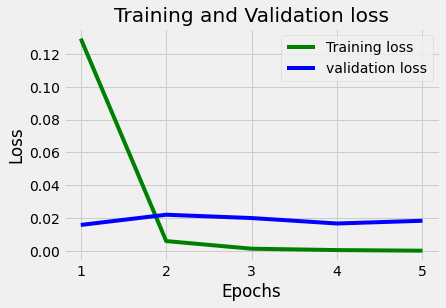

In [26]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

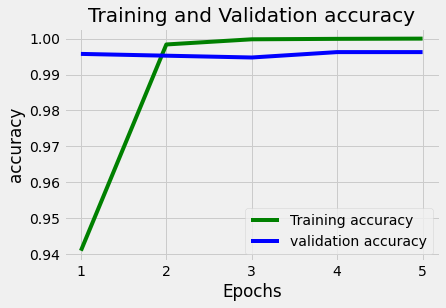

In [27]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [28]:
x_test = np.array(x_test)

y_test = np.array(y_test)

In [ ]:
def ensemble(a,b):
    return(b[0][0])

In [29]:
def convert(result):
    for i in range(len(result)):
        if(result[i]<0.5):
            result[i]=0
        else:
            result[i]=1
    return result
    

In [30]:
#LSTM Accuracy
scores = lstm.evaluate(x_test,y_test) 
print("Accuracy: %.2f%%" % (scores[1]*100))


125/125 [==============================] - 33s 260ms/step - loss: 0.0183 - accuracy: 0.9962
Accuracy: 99.62%


In [31]:

result = lstm.predict(x_test)
a=convert(result)
a

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [32]:
import sklearn
print(sklearn.metrics.classification_report(y_test,result))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2029
           1       0.99      1.00      1.00      1964

    accuracy                           1.00      3993
   macro avg       1.00      1.00      1.00      3993
weighted avg       1.00      1.00      1.00      3993



In [33]:
models = list()
models.append(('cnn', cnn))
models.append(('lstm', lstm))


In [35]:
#ensembling
ensemble = VotingClassifier(estimators=models, voting='soft')
history = ensemble.fit(X_train, y_train)

In [37]:
scores = ensemble.evaluate(x_test,y_test) 
print("Accuracy: %.2f%%" % (scores[1]*100))


125/125 [==============================] - 16s 131ms/step - loss: 0.0134 - accuracy: 0.9977
Accuracy: 99.77%


In [43]:
#GUI repres
import tkinter as tk
#import tkSimpleDialog
#import tkMessageBox

url = ""
root = tk.Tk()
root.geometry('400x200')

#def remove():
 #   lab2.config(text="")
def button_command():
        
    #remove()
    url = entry1.get()
    print(url)
    url_repr= one_hot(url,voc_size)
    n = 370-len(url)
    url1 = [0]*n
    embedded_doc = url1
    embedded_doc.extend(url_repr)
    embedded_doc
    embedded_doc = np.array(embedded_doc)
    url_x = model.predict(embedded_doc)
    url_x
    result1 = lstm.predict(embedded_doc)
    result1
    res = [ord(ele) for sub in url for ele in sub] 
    lent=len(res)
    
    temp=784-lent
    for i in range(temp):
        res.append(0)
    res
    url1 = np.array(res)
    url1 = url1.reshape(1, 28, 28, 1)
    url1 = url1.astype('float32')
    url1 /= 255
    result2 = cnn.predict(url1[0:1])
    result2
    result1 = 0
    final = ensemble(result1,result2)
    final
    if final == 1:
        c="Malicious URL(not safe to use)"
    else:
        c="Benign URL (safe to use)"
    lab2=tk.Label(text=c,font=20).pack()
lab2=tk.Label(text="",font=20).pack()
b= tk.StringVar()
entry1 = tk.Entry(root, width = 100)
entry1.pack()
#empty = tk.Label(root,fg='green')
#empty.grid(row=2,column=1,pady=10)

tk.Button(root, text="CHECK", command=button_command).pack()

#Text = tk.Entry(textvariable=b).pack()
#empty.grid(row=2,column=1,sticky=w,pady=10)

root.mainloop()

http://grantland.com/features/nate-boyer-journey-actor-starting-long-snapper-texas/
http://grantland.com/features/nate-Boyer-journey-starting-snapper-texas/
